In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline
print('Finish Import')

Finish Import


In [6]:
import IPython.display as ipd
from scipy.io import wavfile

train_audio_path = './test/audio/'
filename = ''
sample_rate, samples = wavfile.read('test/audio/clip_744c96937.wav')
ipd.Audio(samples, rate=sample_rate)


In [66]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    print(nperseg, noverlap)
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=1000,
                                    noverlap=500,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)


320 160
501 23 23 12288


Text(0.5, 0, 'Seconds')

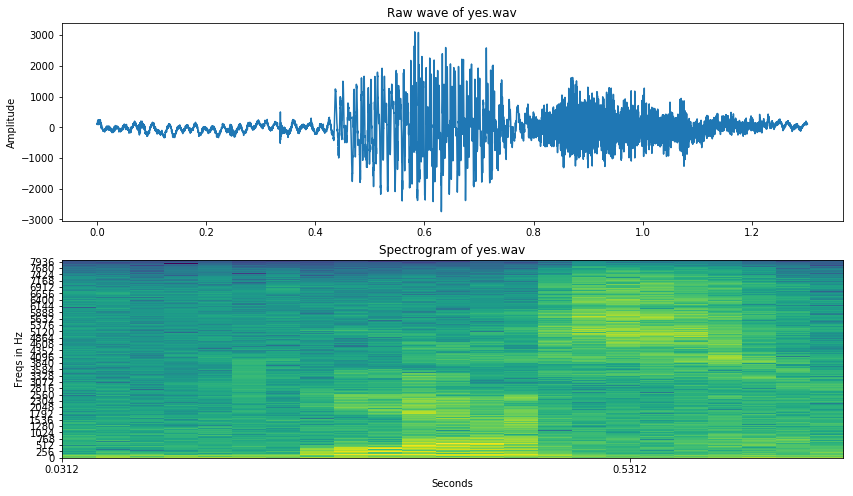

In [67]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)
print(len(freqs), len(times), len(spectrogram), len(samples))
# print(freqs, times, spectrogram, sep='\n\n')
# print(samples.shape, len(np.linspace(0, sample_rate/len(samples), len(samples))))


fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), len(samples)), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [80]:
# print(len(spectrogram), len(freqs), len(times))
# j = 1
# for i in spectrogram:
#     print(j, i.max(), i.mean(),)
#     print('  ', end='')
#     for k in i:
#         if k > 3:
#             print(k, end=' ')
#     print('')
#     j = j + 1

In [85]:
samples = samples.astype(np.float32)
print(samples.dtype)

float32


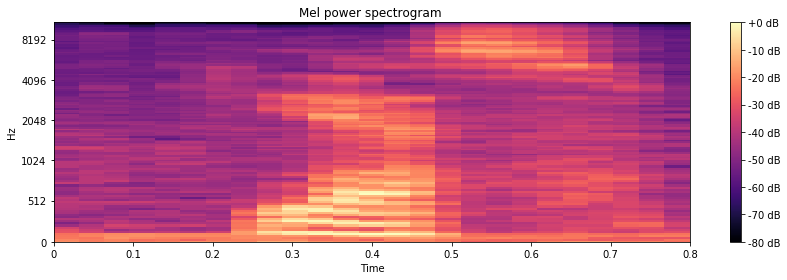

In [86]:
# From this tutorial
# https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


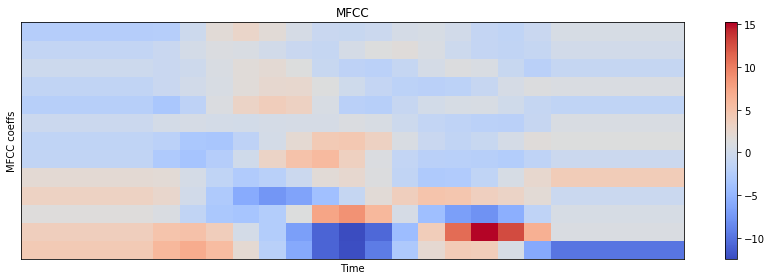

In [87]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [89]:
ipd.Audio(samples, rate=sample_rate)

In [90]:
samples_cut = samples[4000:13000]
ipd.Audio(samples_cut, rate=sample_rate)

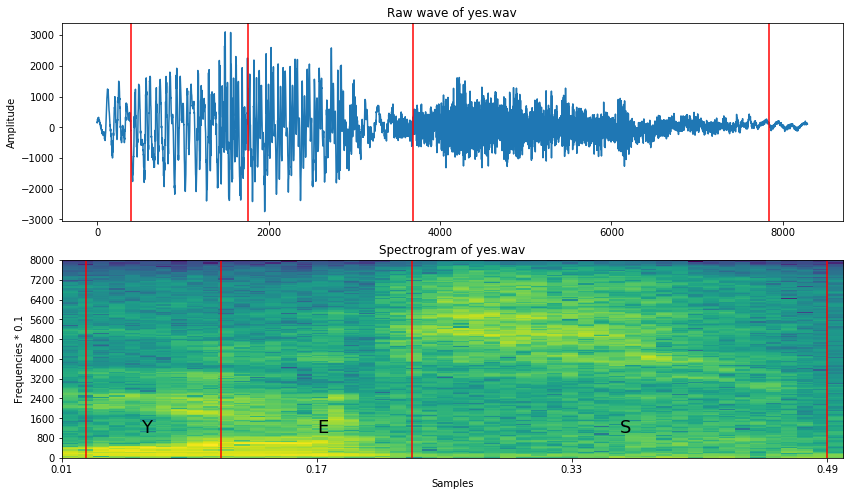

In [91]:
freqs, times, spectrogram_cut = log_specgram(samples_cut, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(samples_cut)

ax2 = fig.add_subplot(212)
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Frequencies * 0.1')
ax2.set_xlabel('Samples')
ax2.imshow(spectrogram_cut.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.text(0.06, 1000, 'Y', fontsize=18)
ax2.text(0.17, 1000, 'E', fontsize=18)
ax2.text(0.36, 1000, 'S', fontsize=18)

xcoords = [0.025, 0.11, 0.23, 0.49]
for xc in xcoords:
    ax1.axvline(x=xc*16000, c='r')
    ax2.axvline(x=xc, c='r')

In [5]:
import time
import sys

for i in range(100):
    time.sleep(.1)
    sys.stdout.write("\r%d%%" % i)
    sys.stdout.flush()
print('hahah')

99%hahah


In [15]:
from pathlib import Path

train_path = './train/audio/'
file_names = [(str(file), file.parts[-2]) for file in Path(train_path).glob("**/*.wav") if file]
for i in file_names[:5000]:
    print(i)

('train/audio/zero/b087aa0e_nohash_3.wav', 'zero')
('train/audio/zero/9e42ae25_nohash_1.wav', 'zero')
('train/audio/zero/adb45ef2_nohash_1.wav', 'zero')
('train/audio/zero/6e8b9b7b_nohash_0.wav', 'zero')
('train/audio/zero/57cb3575_nohash_2.wav', 'zero')
('train/audio/zero/b433332a_nohash_0.wav', 'zero')
('train/audio/zero/bbb2eb5b_nohash_0.wav', 'zero')
('train/audio/zero/ad63d93c_nohash_0.wav', 'zero')
('train/audio/zero/4a0e2c16_nohash_2.wav', 'zero')
('train/audio/zero/3c8dc702_nohash_2.wav', 'zero')
('train/audio/zero/db8a3397_nohash_0.wav', 'zero')
('train/audio/zero/be7a5b2d_nohash_4.wav', 'zero')
('train/audio/zero/8d5d076d_nohash_0.wav', 'zero')
('train/audio/zero/fa44fcf5_nohash_0.wav', 'zero')
('train/audio/zero/fd395b74_nohash_2.wav', 'zero')
('train/audio/zero/76424fa5_nohash_0.wav', 'zero')
('train/audio/zero/27b9a84f_nohash_1.wav', 'zero')
('train/audio/zero/8dd788d8_nohash_1.wav', 'zero')
('train/audio/zero/26e573a9_nohash_0.wav', 'zero')
('train/audio/zero/8281a2a8_noh

('train/audio/stop/61a9f72a_nohash_0.wav', 'stop')
('train/audio/stop/77def3ee_nohash_0.wav', 'stop')
('train/audio/stop/68dd409e_nohash_1.wav', 'stop')
('train/audio/stop/97f4c236_nohash_0.wav', 'stop')
('train/audio/stop/e4b02540_nohash_0.wav', 'stop')
('train/audio/stop/cc6ee39b_nohash_0.wav', 'stop')
('train/audio/stop/cae62f38_nohash_0.wav', 'stop')
('train/audio/stop/46a153d8_nohash_0.wav', 'stop')
('train/audio/stop/2bdbe5f7_nohash_0.wav', 'stop')
('train/audio/stop/24632875_nohash_0.wav', 'stop')
('train/audio/stop/1a9afd33_nohash_1.wav', 'stop')
('train/audio/stop/dea820ce_nohash_0.wav', 'stop')
('train/audio/stop/cdfbbe75_nohash_1.wav', 'stop')
('train/audio/stop/ecef25ba_nohash_2.wav', 'stop')
('train/audio/stop/6d1dcca6_nohash_0.wav', 'stop')
('train/audio/stop/32561e9e_nohash_0.wav', 'stop')
('train/audio/stop/49af4432_nohash_1.wav', 'stop')
('train/audio/stop/77655bdf_nohash_1.wav', 'stop')
('train/audio/stop/1e31353f_nohash_2.wav', 'stop')
('train/audio/stop/ced835d3_noh

('train/audio/stop/f5e5e8b0_nohash_0.wav', 'stop')
('train/audio/stop/ffb86d3c_nohash_2.wav', 'stop')
('train/audio/stop/adc216c5_nohash_0.wav', 'stop')
('train/audio/stop/a9b574b3_nohash_0.wav', 'stop')
('train/audio/stop/462e1919_nohash_0.wav', 'stop')
('train/audio/stop/708b8d51_nohash_0.wav', 'stop')
('train/audio/stop/dca2797e_nohash_4.wav', 'stop')
('train/audio/stop/3cdecb0b_nohash_0.wav', 'stop')
('train/audio/stop/49af4432_nohash_4.wav', 'stop')
('train/audio/stop/e96a5020_nohash_1.wav', 'stop')
('train/audio/stop/bfaf2000_nohash_0.wav', 'stop')
('train/audio/stop/4c432947_nohash_1.wav', 'stop')
('train/audio/stop/1a673010_nohash_0.wav', 'stop')
('train/audio/stop/74b73f88_nohash_1.wav', 'stop')
('train/audio/stop/7910d292_nohash_1.wav', 'stop')
('train/audio/stop/6cf5459b_nohash_0.wav', 'stop')
('train/audio/stop/35d1b6ee_nohash_0.wav', 'stop')
('train/audio/stop/171b56dc_nohash_0.wav', 'stop')
('train/audio/stop/39543cfd_nohash_0.wav', 'stop')
('train/audio/stop/0ff728b5_noh